<a href="https://colab.research.google.com/github/jlopez1288/Predictive_Analytics101/blob/main/DiamondPriceAnalysis_Project_1_JenniferLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

# Introduction: 
**What are Diamonds?** 
*  " Diamonds are among nature’s most precious and beautiful creations.Diamond forms under high temperature and pressure conditions that exist only about 100 miles beneath the earth’s surface. Diamond’s carbon atoms are bonded in essentially the same way in all directions."
*   "Diamonds are assesed by Geomological Institute of America (GIA) by 4 quality factors or just by simply calling them as the 4C's: Color, Clarity, Cut and Carat Weight,  along with a plotted diagram of its clarity characteristics, a confirmation of geographic origin, and laser inscription of GIA report number for easy identification. This service is only for eligible natural diamonds, weighing 0.15 carats or more, that have gone through rough analysis with GIA before polishing." *italicized text*

**Dataset dictionary or features:**

*   **Carat weight range** (0.2-5.01)
*   **Cut quality** (Fair,Good,Very Good, Premium & Ideal)
*   **Color range** from J (Worst) to D (Best)
*   **Clarity Grade: determined by inclusions**(I1 (Worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Best))
*   **Depth**: height of a Diamond (43 to 79)
*  **Table** width of a Diamond: determines the avg percentage of diameter
*   **Price** in US dollars
*   **X** length in mm
*   **Y** width in mm
*   **Z** depth in m











In this dataset we are going to analyze the features of diamonds with the 4C's that are listed in the dataset in order to predict the pricing by their features





#Task 2a: Install the Needed Libraries

In [2]:
#not needed at this time

#Task 2b: Import the Needed Libraries

In [3]:
#libraries for number manipulation
import numpy as np
#library for data manipulation
import pandas as pd

#libraries for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

#Some configuration settings for alignment
%matplotlib inline
pd.set_option("display.max_columns", 100)



#importing sklearn libraries from linear regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')










Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Task 3: Load the Data

In [4]:
diamond = pd.read_csv("/content/drive/MyDrive/diamondsdataset.csv")
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [5]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
diamond.shape

(53940, 10)

In [7]:
#This dataset has 53940 rows and 10 columns

##Get Data Info

In [8]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
## x, y, z has some min values equal to 0, which is not suitable for model training . These values need to be in the dataset when we use the outliers.

In [11]:
#wherever there is 0.0 will be removed

In [12]:
##Stats values

##Find Missing Values

In [13]:
diamond.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [14]:
diamond.isna().any().any()

False

In [15]:
#there are no missing values

In [16]:
#Index colum is not needed, might drop it

#Task 5: Perform Data Cleaning

In [17]:
#drop index column

In [18]:
diamond.reset_index(drop=True, inplace=True)

In [19]:
#check if dropped column is deleted from dataset

In [20]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [23]:
#About 20 rows were deleted in the Diamonds dataset

#Task 6: Visualize Cleaned up Dataset

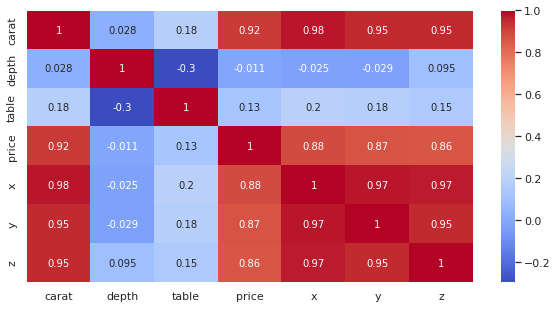

In [24]:
plt.figure(figsize = (10,5))
sns.heatmap(diamond.corr(),annot = True , cmap = 'coolwarm' );

In [25]:
##color shades for the hue in the plot

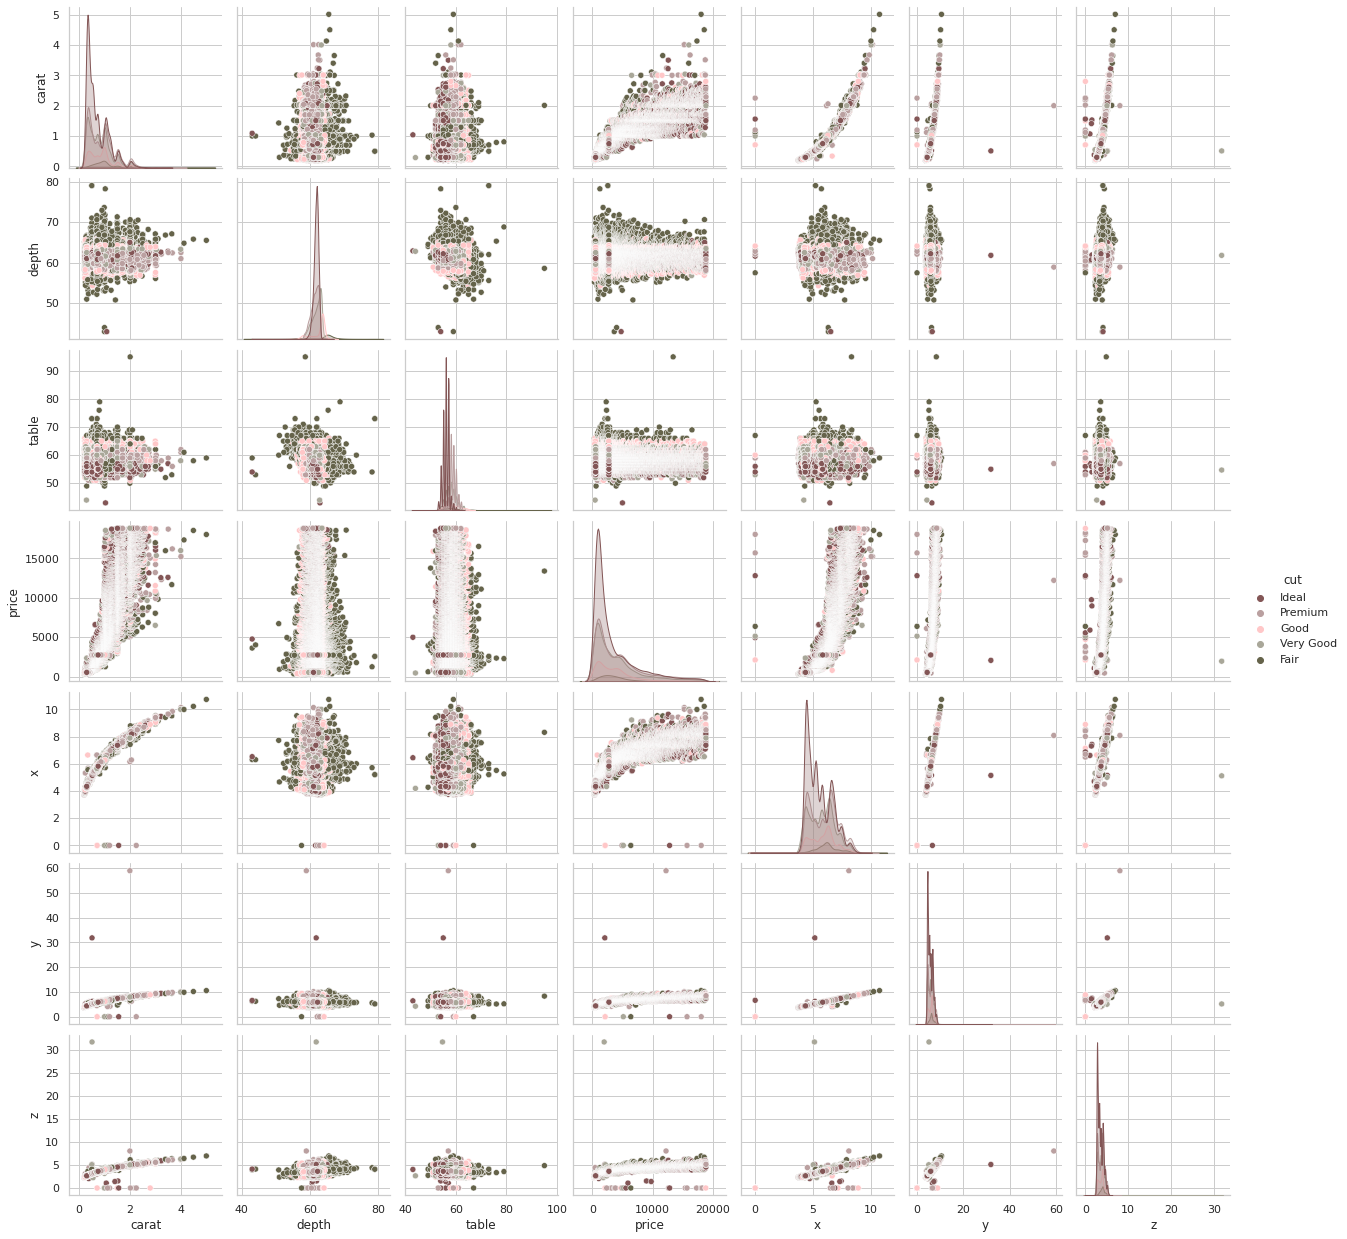

In [26]:
shade =["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
ax = sns.pairplot(diamond, hue= "cut",palette=shade)


In [27]:
#corr of each column with each column
#correlation for regression line in price Vs. y = 2 outliers
#correlation for regression line in price Vs z = 2 outliers
#correlation for regression line in price Vs. depth= > 5 outliers
## "cut" will the be the hue and also other features can be observed in hue with less value_count. 
#THIS CODE FOR THE PAIRPLOT TAKES A WHILE TO RUN !!!

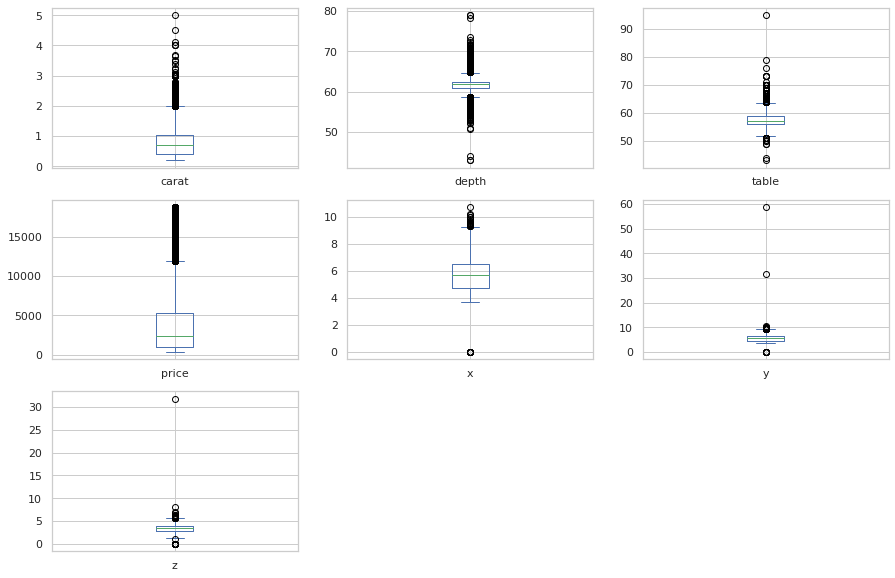

In [28]:
diamond.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [29]:
#carat falls between 0.7
#depth falls around 60m
#table falls approx. 58 avg  % diameter
#price falls aroun $300
#x around 5.8 mm
#y around 8 mm
#z around 4.8 mm


#Task 7: Conceptualize the problem

In [30]:
#Observed outliers/data points that can disturb ML model
#Y & Z points show the outliers that need to be eliminated
#visualize regressions plots to zoom in the outliers that need to eliminated

In [31]:
diamond = diamond[(diamond["depth"]<75)&(diamond["depth"]>45)]
diamond = diamond[(diamond["table"]<80)&(diamond["table"]>40)]
diamond = diamond[(diamond["x"]<30)]
diamond = diamond[(diamond["y"]<30)]
diamond= diamond[(diamond["z"]<30)&(diamond["z"]>2)]
diamond.shape

(53907, 10)

In [32]:
#plot after data cleaning to check for outliers

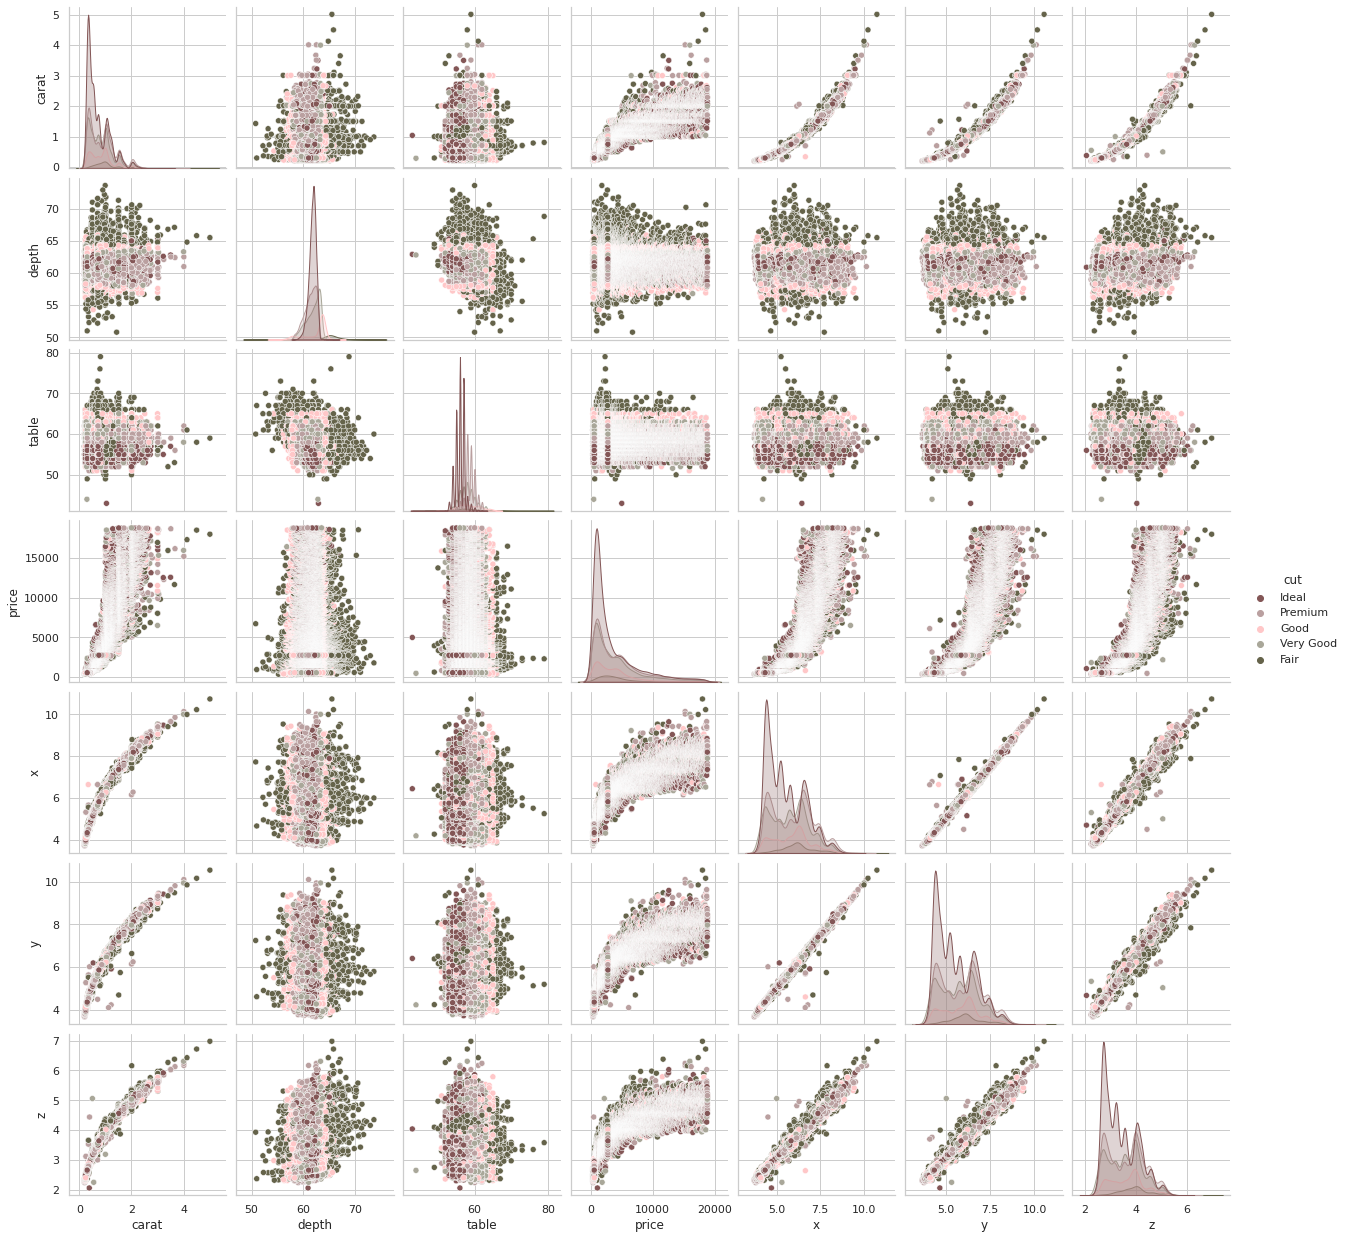

In [33]:
shade =["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
ax=sns.pairplot(diamond, hue= "cut",palette=shade)

In [34]:
#outliers have been removed
#THIS CODE FOR THE PAIRPLOT TAKES A WHILE TO RUN

In [35]:
#Review categorical variables and make a list
s = (diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [36]:
#This 3 categorical features can be plotted to observe their disbritution

Text(0.5, 0, 'Cut')

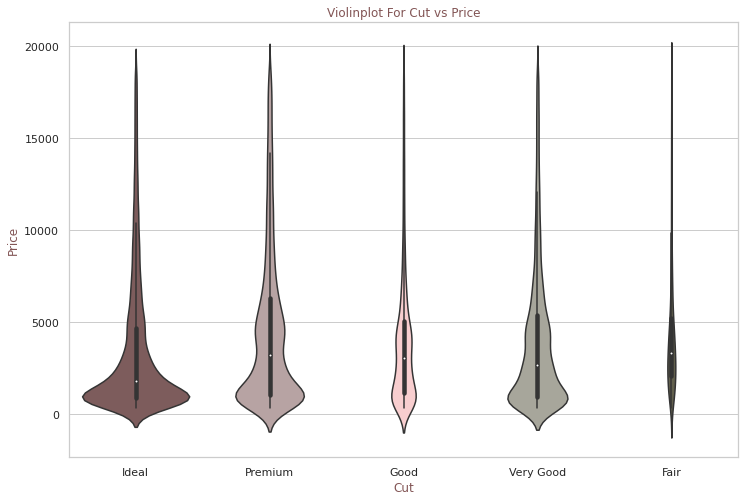

In [37]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="cut",y="price", data=diamond, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#835656")
ax.set_ylabel("Price", color="#835656")
ax.set_xlabel("Cut", color="#835656")


Text(0.5, 0, 'Color')

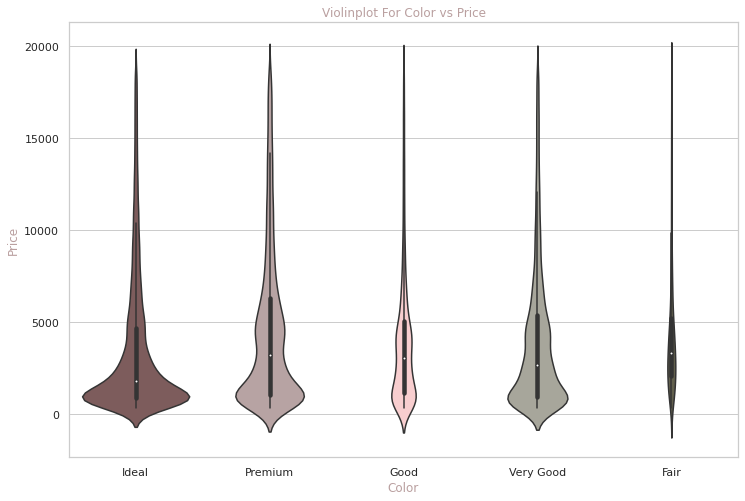

In [38]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="cut",y="price", data=diamond, palette=shade,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#baa0a0")
ax.set_ylabel("Price", color="#baa0a0")
ax.set_xlabel("Color", color="#baa0a0")

Text(0.5, 0, 'Clarity')

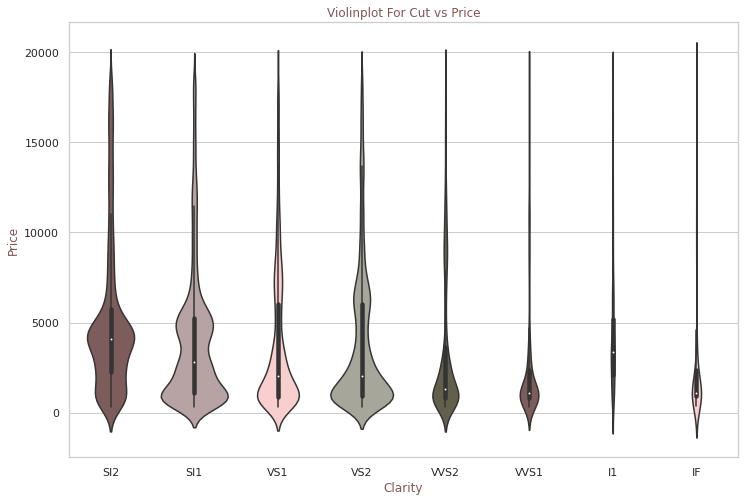

In [39]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="clarity",y="price", data=diamond, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#835656")
ax.set_ylabel("Price", color="#835656")
ax.set_xlabel("Clarity", color="#835656")

Text(0.5, 0, 'Color')

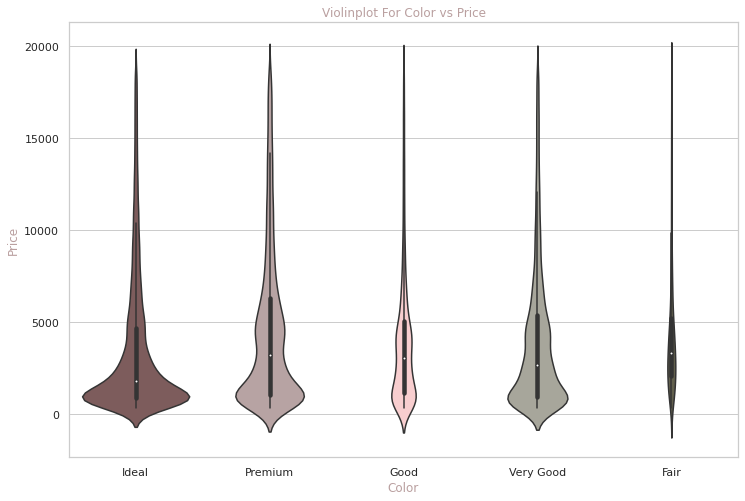

In [40]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="cut",y="price", data=diamond, palette=shade,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#baa0a0")
ax.set_ylabel("Price", color="#baa0a0")
ax.set_xlabel("Color", color="#baa0a0")

In [41]:
# About 3 categorical variables. I might have to  encode the data and replace the object datatype

In [42]:
# Make copy to avoid changing original data 
label_data = diamond.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [43]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


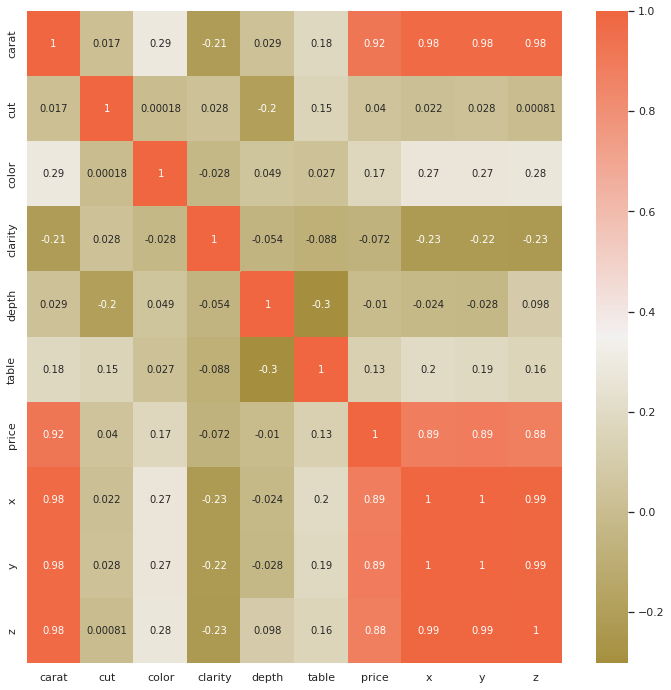

In [44]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=80, l=60, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [45]:
# 'x', 'y', and 'z' have a high correlation with the target colum 'price'
#'depth' , 'cut' and table show a low correlation . Drop columns?

#Task 8: Perform Data-Split

#Build the Model in steps


*   Assign the variable X= features & y= target
*   Build a pipeline that is scaled for 5 models
*   Fit the model with Train ML Model
*   Average cross-validation on training set
*   Choose the model that has the best cross-validation score
*   Fit the best model on the training model set







In [46]:
# Assigning the features as X and target as y
from sklearn.model_selection import train_test_split
X= label_data.drop(["price"],axis =1)
y= label_data["price"]


In [47]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
#Data  Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.26, random_state=8)

In [49]:
#I used random state=48 to see the split

In [50]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

39891 14016 39891 14016


In [51]:
#let's take a look at the shape

In [52]:
X_train.shape, y_train.shape

((39891, 9), (39891,))

In [53]:
#Create Pipeline models with standard scalers
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [54]:
#Pipeline list
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

In [55]:
#Pipeline & model dictionary
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

In [56]:
#Pipeline fitting
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[23:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#Task 9: Choose the ML Method to follow

In [57]:
##View our test and train overview sets 

In [58]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
       carat  cut  color  clarity  depth  table     x     y     z
6256    0.92    3      1        3   61.7   59.0  6.18  6.27  3.84
46093   0.51    2      0        5   61.0   57.0  5.15  5.18  3.15
44563   0.52    1      0        2   63.7   55.0  5.12  5.09  3.25
27941   0.23    4      3        7   62.9   55.0  3.88  3.92  2.45
28480   0.32    4      1        2   63.5   56.0  4.38  4.34  2.77

X_test : 
       carat  cut  color  clarity  depth  table     x     y     z
6773    0.91    2      4        4   62.9   55.0  6.23  6.13  3.89
36826   0.41    1      1        6   64.3   54.0  4.68  4.72  3.02
37849   0.33    3      1        4   61.5   59.0  4.46  4.42  2.73
36974   0.43    3      0        5   59.7   59.0  4.93  4.89  2.93
12242   0.90    1      1        4   62.7   58.0  6.07  6.12  3.82

y_train : 
6256     4011
46093    1740
44563    1605
27941     431
28480     672
Name: price, dtype: int64

y_test : 
6773     4109
36826     957
37849    1002
36974     963
12242    52

#Task 10: Train the ML Model

In [59]:
regr = LinearRegression()
model = regr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 1339.6582082650364
R2  : 0.9418941636852677


In [9]:
#Loading the dataset and preprocessing the data
import keras
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets)= boston_housing.load_data()

mean = train_data.mean(axis = 0)
train_data-= mean
std = train_data.std(axis = 0)

train_data/= std
test_data-= mean
test_data/= std


In [8]:
#Training a neural network model on it
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation ="relu", input_shape =(train_data.shape[1], )))
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(1))
model.compile(optimizer ="rmsprop", loss ="mse", metrics =["mae"])
loss, accuracy = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 2ms/step - loss: 615.4287 - mae: 23.0252


In [10]:
#Saving and reloading model in HDF5 file format
from keras.models import load_model
model.save("network.h5")
loaded_model = load_model("network.h5")
loss, accuracy = loaded_model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 2ms/step - loss: 615.4287 - mae: 23.0252


#Task 11: Test the Model

In [ ]:
#2nd Notebook should have the models for testing and predictions

##References:


*   https://www.gia.edu/diamond
*   https://www.gia.edu/analysis-grading-sample-report-diamond?reporttype=diamond-origin-report&reporttype=diamond-origin-report
*   https://4cs.gia.edu/en-us/4cs-diamond-quality/?_ga=2.253491648.853993139.1669481225-954916680.1669481225

*   https://www.youtube.com/watch?v=6Bx4JzfgCBM
*   https://seaborn.pydata.org/generated/seaborn.violinplot.html
*   https://www.geeksforgeeks.org/ml-saving-a-deep-learning-model-in-keras/?ref=rp
*   











###Challenges
Running and training the models . They kept on crashing , also trying to save with the appropiate model.